In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.tree import plot_tree


In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\archive\adult.csv")
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [6]:
df.income.value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [7]:
df.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [8]:
df.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [9]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [23]:
df.relationship.unique()

array([3, 0, 1, 4, 5, 2])

In [10]:
df.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [11]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1])

In [12]:
df = df.drop(columns=['education', 'fnlwgt'])


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [15]:
X = df.drop('income', axis=1)
y = df['income']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [17]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [18]:
y_pred = model.predict(X_test)


In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8252635889036749
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      7479
           1       0.63      0.62      0.63      2290

    accuracy                           0.83      9769
   macro avg       0.76      0.75      0.76      9769
weighted avg       0.82      0.83      0.82      9769



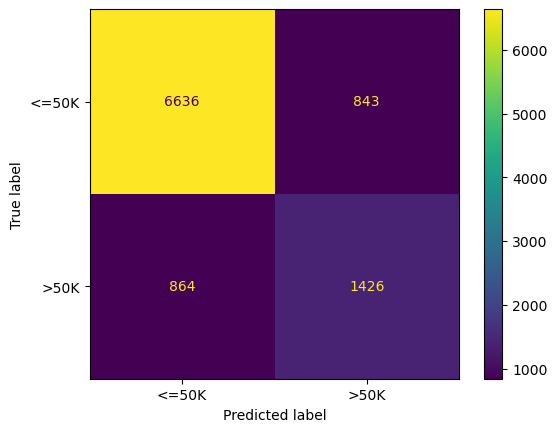

In [20]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = [0,1])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=["<=50K", ">50K"])
disp.plot()

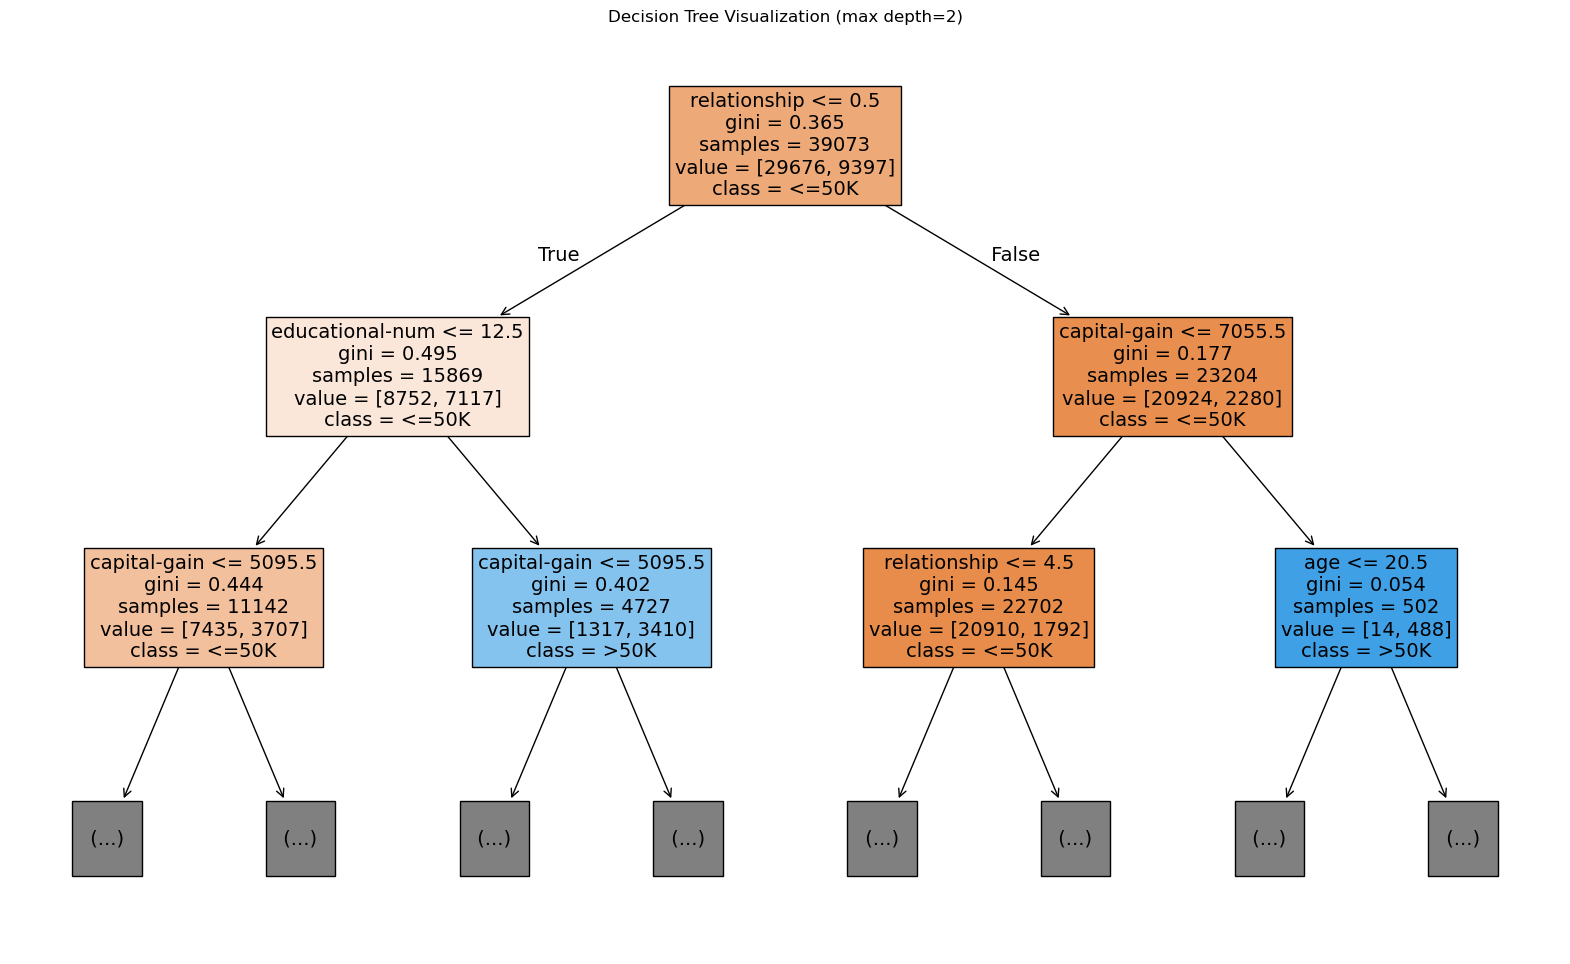

In [21]:
plt.figure(figsize=(20, 12))
plot_tree(
    model,                # your trained decision tree model variable (e.g. 'model' or 'decision_tree')
    max_depth=2,          # limit depth for readability
    fontsize=14,
    feature_names=X.columns,
    class_names=['<=50K', '>50K'],  # optional but helpful
    filled=True           # adds color to nodes based on class
)
plt.title("Decision Tree Visualization (max depth=2)")
plt.show()

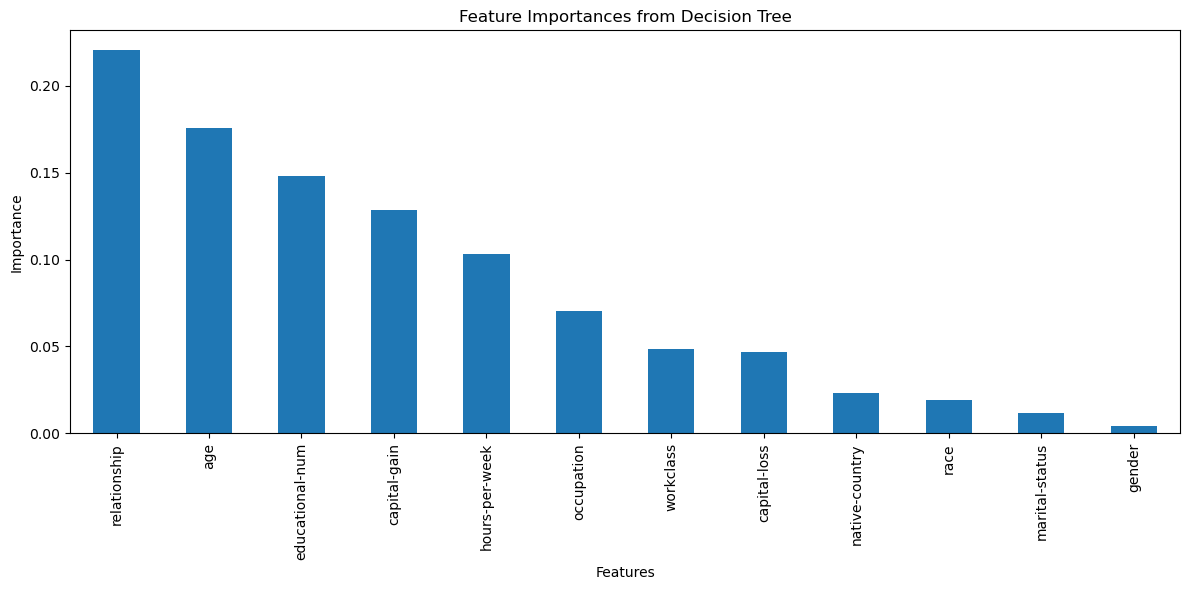

In [22]:
# Assuming your decision tree model is called 'decision_tree'
importances = model.feature_importances_

# Create a Pandas Series with feature names as the index
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot feature importances as a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
forest_importances.plot.bar(ax=ax)

ax.set_title("Feature Importances from Decision Tree")
ax.set_ylabel("Importance")
ax.set_xlabel("Features")
plt.tight_layout()
plt.show()


In [24]:
importances = model.feature_importances_

# Convert to a Series for easier ranking and plotting
feature_importance_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Show top features
print("🔝 Top Feature Importances:")
print(feature_importance_series.head(10))  # Show top 10 features

# Specifically print the rank of 'relationship'
rank = feature_importance_series.index.get_loc('relationship') + 1  # +1 to make it human-readable
print(f"\n📊 'relationship' ranks #{rank} in importance out of {len(X.columns)} features.")

🔝 Top Feature Importances:
relationship       0.220787
age                0.175904
educational-num    0.148164
capital-gain       0.128447
hours-per-week     0.102948
occupation         0.070376
workclass          0.048432
capital-loss       0.046678
native-country     0.023372
race               0.019043
dtype: float64

📊 'relationship' ranks #1 in importance out of 12 features.
